In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
# Load dataset
data = pd.read_csv("creditcard.csv")

In [4]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [5]:
# Preprocess the data
X = data.drop('Class', axis=1)
y = data['Class']

In [6]:
pd.options.display.max_columns = None
print(f"Number of columns: {data.shape[1]}")
print(f"Number of rows: {data.shape[0]}")
print(data.info())

Number of columns: 31
Number of rows: 284807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20

In [7]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Data preprocessing
data['Amount'] = StandardScaler().fit_transform(pd.DataFrame(data['Amount']))
data = data.drop(['Time'], axis=1)
data = data.drop_duplicates()
print("Data shape after dropping duplicates:", data.shape)
print("Class distribution:\n", data['Class'].value_counts())

Data shape after dropping duplicates: (275663, 30)
Class distribution:
 Class
0    275190
1       473
Name: count, dtype: int64


<Axes: xlabel='Class'>

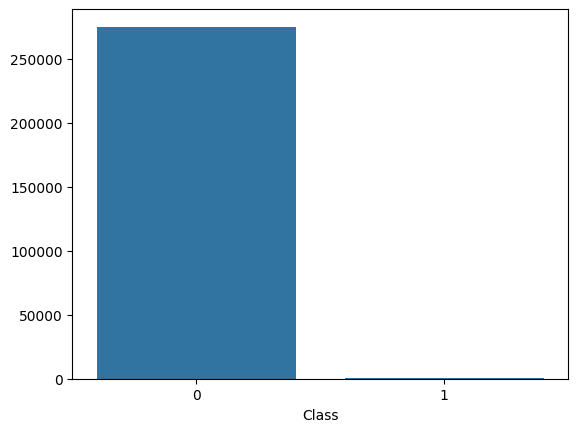

In [9]:
class_counts = data['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)

In [10]:
plt.show()

In [11]:
# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# After train-test split, before SMOTE
print("Before SMOTE:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Training class distribution:\n{y_train.value_counts()}")
print(f"Testing class distribution:\n{y_test.value_counts()}")


Before SMOTE:
Training samples: 220530
Testing samples: 55133
Training class distribution:
Class
0    220148
1       382
Name: count, dtype: int64
Testing class distribution:
Class
0    55042
1       91
Name: count, dtype: int64


In [14]:
# Combine features and target again for saving
train_data = X_train.copy()
train_data['Class'] = y_train

test_data = X_test.copy()
test_data['Class'] = y_test

# Save to CSV
train_data.to_csv("training_data.csv", index=False)
test_data.to_csv("testing_data.csv", index=False)

print("✅ Training and testing data saved as 'training_data.csv' and 'testing_data.csv'")


✅ Training and testing data saved as 'training_data.csv' and 'testing_data.csv'


In [15]:
print(f"Total samples: {len(X)}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Total samples: 275663
Training samples: 220530
Testing samples: 55133


In [16]:
print("Class distribution in Training Data:")
print(y_train.value_counts())

print("\nClass distribution in Testing Data:")
print(y_test.value_counts())


Class distribution in Training Data:
Class
0    220148
1       382
Name: count, dtype: int64

Class distribution in Testing Data:
Class
0    55042
1       91
Name: count, dtype: int64


In [17]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\Users\System75\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [18]:
print("\nAfter SMOTE:")
print(f"Resampled training samples: {X_train_resampled.shape[0]}")
print(f"Resampled class distribution:\n{y_train_resampled.value_counts()}")



After SMOTE:
Resampled training samples: 440296
Resampled class distribution:
Class
0    220148
1    220148
Name: count, dtype: int64


In [19]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [20]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame()

In [21]:
from sklearn.metrics import confusion_matrix

In [21]:
# Train and evaluate each classifier using 5-fold cross-validation
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    
    # 5-fold cross-validation scores (accuracy)
    cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy',n_jobs=-1)
    print(f"5-fold CV Accuracy scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")
    
    # Fit the model on resampled training data
    clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Create a DataFrame with features, actual, and predicted values
    model_results = X_test.copy()
    model_results['Actual'] = y_test
    model_results['Predicted'] = y_pred
    model_results['Model'] = name
    
    # Append the results to the results_df DataFrame
    results_df = pd.concat([results_df, model_results], axis=0)
    
    # Display evaluation metrics
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")


========== Logistic Regression ==========
5-fold CV Accuracy scores: [0.94616171 0.9463655  0.94703551 0.94676297 0.94703551]
Mean CV Accuracy: 0.9466722398353197 ± 0.0003540878840995359
Test Accuracy: 0.9767834146518419
Precision: 0.05930318754633061
Recall: 0.8791208791208791
F1 Score: 0.1111111111111111

========== Decision Tree Classifier ==========
5-fold CV Accuracy scores: [0.99838746 0.99860321 0.99853507 0.99859185 0.99847829]
Mean CV Accuracy: 0.9985191783066739 ± 7.951853128624904e-05
Test Accuracy: 0.9978234451236102
Precision: 0.4088050314465409
Recall: 0.7142857142857143
F1 Score: 0.52

========== Random Forest Classifier ==========
5-fold CV Accuracy scores: [0.99987509 0.99980695 0.9998978  0.9998183  0.99992051]
Mean CV Accuracy: 0.9998637280117076 ± 4.4273999775533514e-05
Test Accuracy: 0.9994558612809026
Precision: 0.8588235294117647
Recall: 0.8021978021978022
F1 Score: 0.8295454545454546

========== Support Vector Machine ==========
5-fold CV Accuracy scores: [0.97

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Train and evaluate each classifier using 5-fold cross-validation
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    
    # Fit the model on resampled training data
    clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate and display Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"MCC: {mcc}")



========== Logistic Regression ==========
MCC: 0.22492741956409018

========== Decision Tree Classifier ==========
MCC: 0.5262671611118179

========== Random Forest Classifier ==========
MCC: 0.8022634062758403

========== Support Vector Machine ==========


In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score

# Train and evaluate each classifier using 5-fold cross-validation
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    
    # 5-fold cross-validation
    cv_mcc_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model on resampled training data
    clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate MCC for each fold using cross-validation
    mcc_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='neg_mean_squared_error') # Will use MCC instead of accuracy
    
    # Calculate and display MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"MCC: {mcc}")
    print(f"5-Fold Cross-Validation MCC scores: {mcc_scores}")
    print(f"Mean MCC: {mcc_scores.mean()} ± {mcc_scores.std()}")


In [22]:
# Save the prediction results (features + actual + predicted) to a CSV file
results_df.to_csv("prediction_results.csv", index=False)

In [23]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Resampled train shape:", X_train_resampled.shape, y_train_resampled.shape)

Train shape: (220530, 29) (220530,)
Test shape: (55133, 29) (55133,)
Resampled train shape: (440296, 29) (440296,)


In [24]:
import joblib

# Save trained models
joblib.dump(classifiers["Logistic Regression"], "logistic_regression.pkl")
joblib.dump(classifiers["Decision Tree Classifier"], "decision_tree.pkl")
joblib.dump(classifiers["Random Forest Classifier"], "random_forest.pkl")
joblib.dump(classifiers["Support Vector Machine"], "svm.pkl")

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [28]:
models = {
    "Logistic Regression": classifiers["Logistic Regression"],
    "Decision Tree": classifiers["Decision Tree Classifier"],
    "Random Forest": classifiers["Random Forest Classifier"],
    "SVM": classifiers["Support Vector Machine"]
}


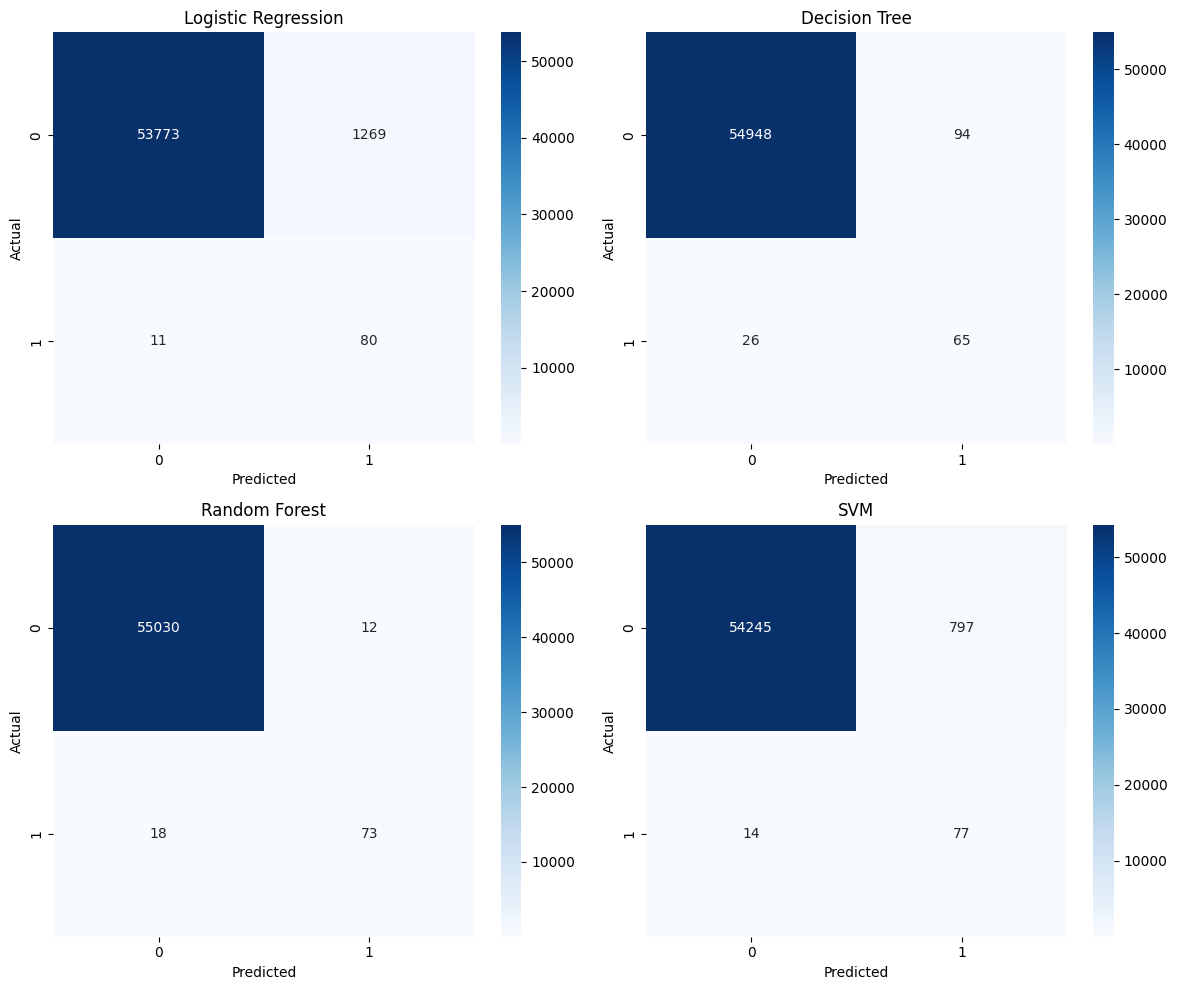

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


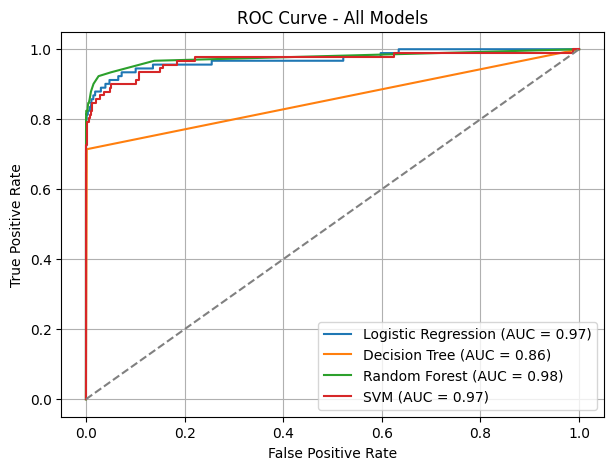

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

plt.figure(figsize=(7, 5))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f"⚠️ {name} does not support probability prediction.")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Initialize an empty list to collect data
confusion_data = []

# Iterate through all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    confusion_data.append({
        'Model': name,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    })

# Create a DataFrame for display
confusion_df = pd.DataFrame(confusion_data)

# Display the table
print(confusion_df)


                 Model  TP     TN    FP  FN
0  Logistic Regression  80  53773  1269  11
1        Decision Tree  65  54948    94  26
2        Random Forest  73  55030    12  18
3                  SVM  77  54245   797  14


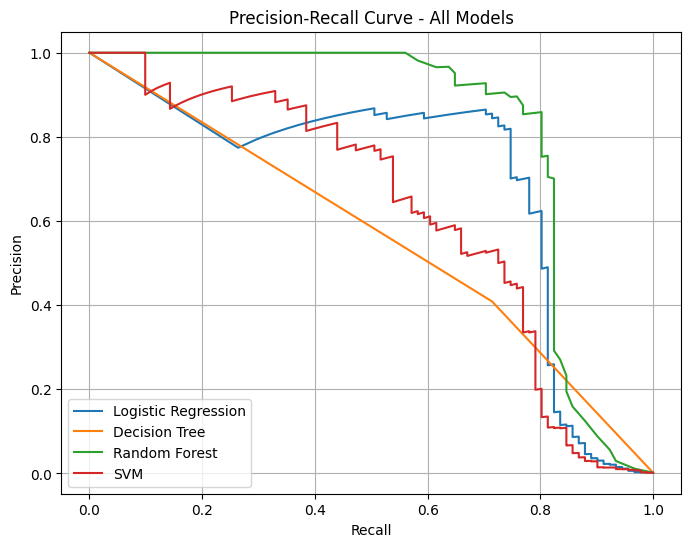

In [40]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        continue

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=name)

plt.title('Precision-Recall Curve - All Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import numpy as np

# Check if the model supports feature importances
if hasattr(clf, "feature_importances_"):
    feature_importances = clf.feature_importances_
    sorted_idx = np.argsort(feature_importances)

    plt.figure(figsize=(10, 6))
    plt.barh(X_test.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Fraud Detection")
    plt.show()


C:\Users\System75\AppData\Local\Temp\ipykernel_12612\3728309277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


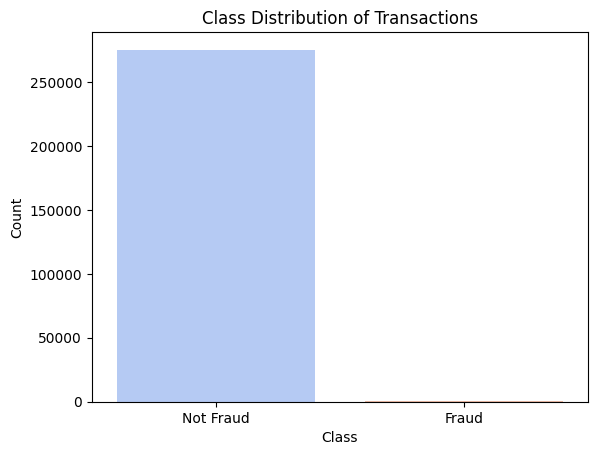

In [32]:
class_counts = y.value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution of Transactions")
plt.show()


C:\Users\System75\AppData\Local\Temp\ipykernel_12612\2200881387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=data["Amount"], palette="Set2")


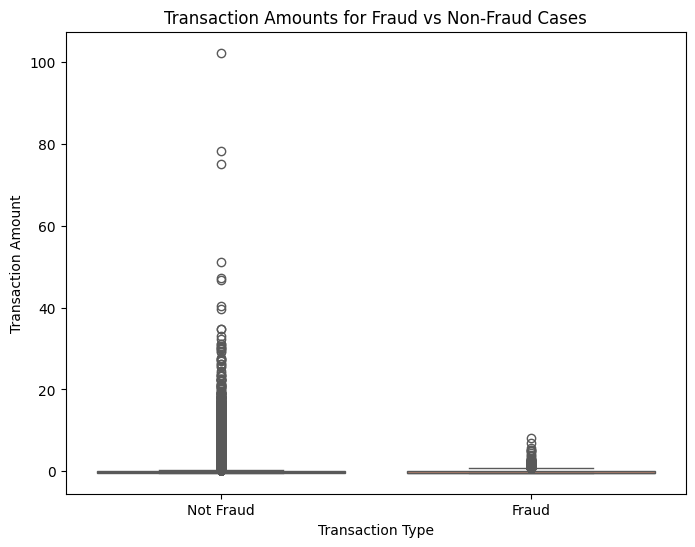

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=data["Amount"], palette="Set2")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amounts for Fraud vs Non-Fraud Cases")
plt.show()


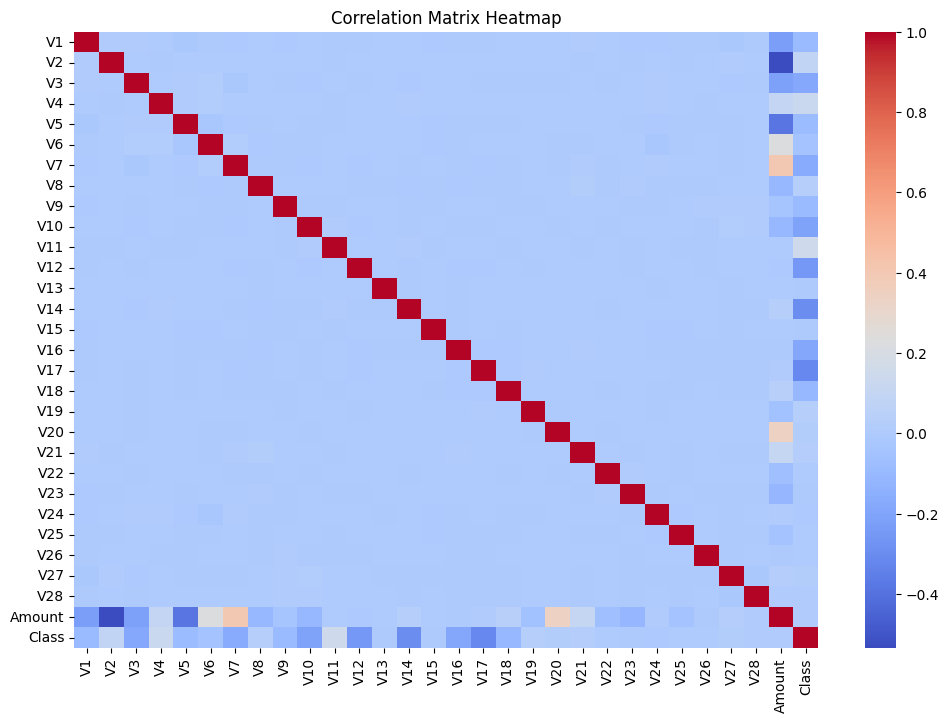

In [35]:
# Plot correlation matrix to see relationships between variables
df=data
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

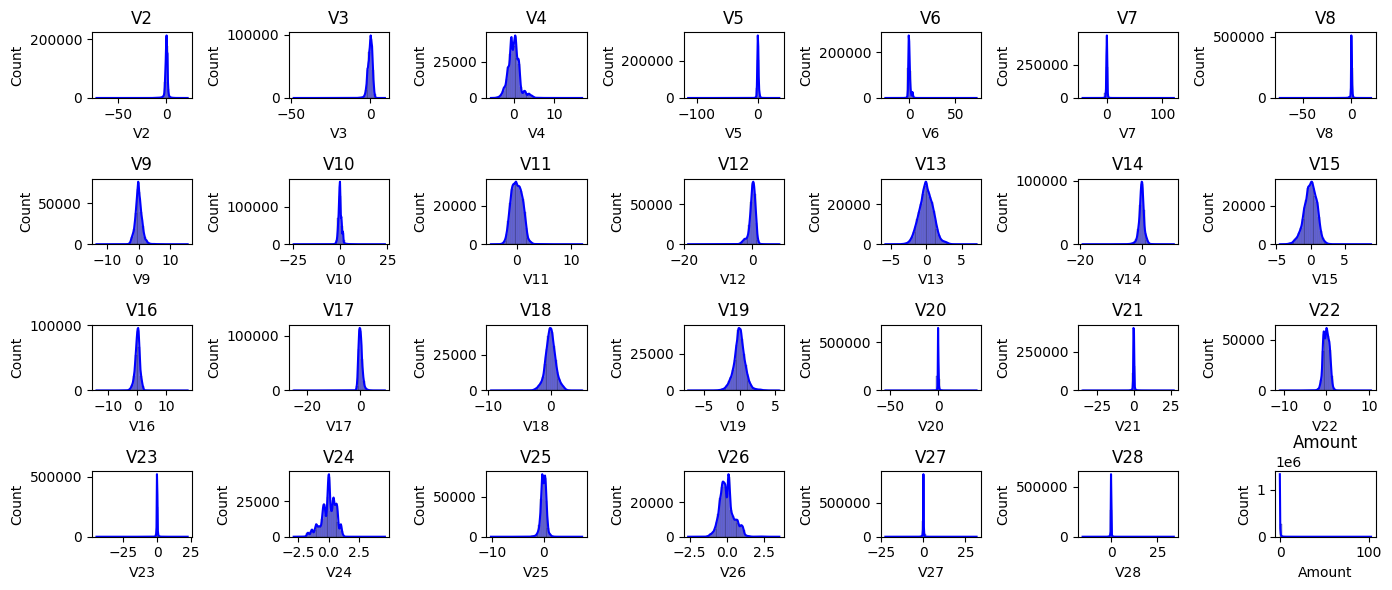

In [36]:
# Visualization of the PCA Components (V1 - V28)
plt.figure(figsize=(14, 6))
for i, column in enumerate(df.columns[1:29], 1):
    plt.subplot(4, 7, i)
    sns.histplot(df[column], bins=50, kde=True, color='blue')
    plt.title(column)
plt.tight_layout()
plt.show()

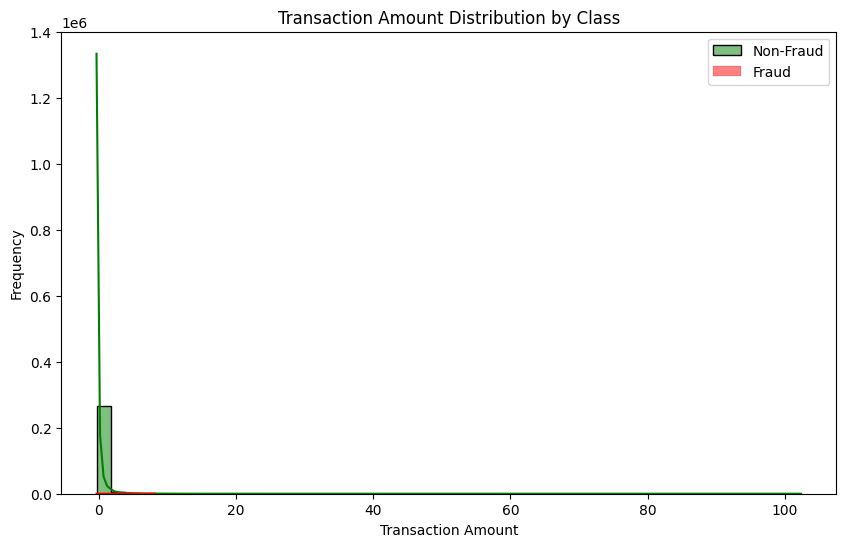

In [37]:
# Show the distribution of 'Amount' column for fraud and non-fraud transactions
df=data
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [38]:
import pandas as pd
test_data = pd.read_csv('testing_data.csv')  # Replace with your actual file name

# Filter for Class 1
class_1_data = test_data[test_data['Class'] == 1]

# Save the filtered data to a new CSV
class_1_data.to_csv('class_1_testing_data.csv', index=False)

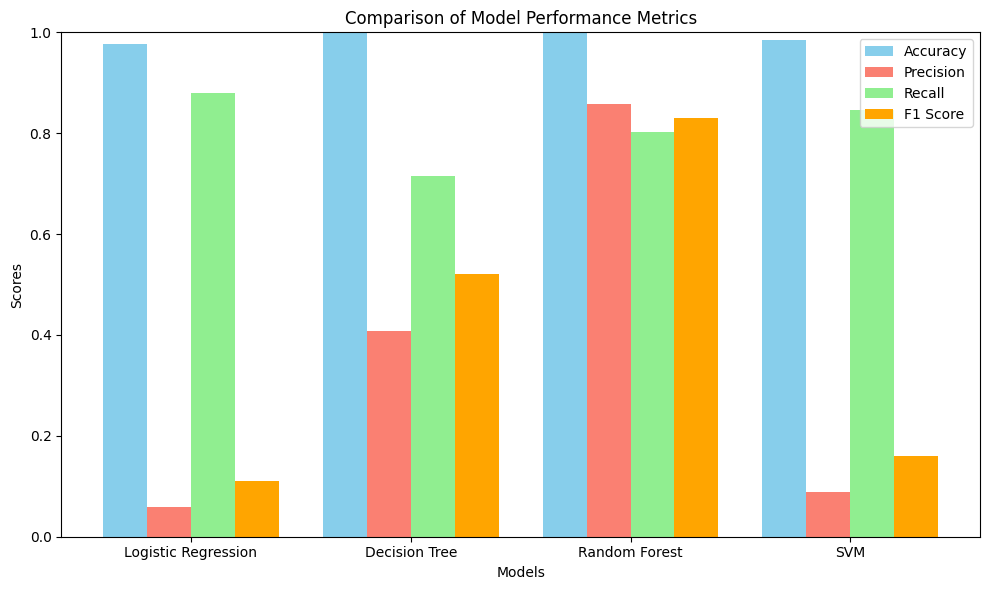

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Model Names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Metrics
accuracy = [0.9767834146518419, 0.9978234451236102, 0.9994558612809026, 0.9852901166270654]
precision = [0.05930318754633061, 0.4088050314465409, 0.8588235294117647, 0.08810068649885583]
recall = [0.8791208791208791, 0.7142857142857143, 0.8021978021978022, 0.8461538461538461]
f1_score = [0.1111111111111111, 0.52, 0.8295454545454546, 0.15958549222797927]

# Set bar width
bar_width = 0.2

# Set positions for the bars
index = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
bar1 = ax.bar(index - 1.5 * bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar(index - 0.5 * bar_width, precision, bar_width, label='Precision', color='salmon')
bar3 = ax.bar(index + 0.5 * bar_width, recall, bar_width, label='Recall', color='lightgreen')
bar4 = ax.bar(index + 1.5 * bar_width, f1_score, bar_width, label='F1 Score', color='orange')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)

# Adding the legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()
